In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/debs challenge/1000rowspublic_fixed.csv')

In [ ]:
df.head(6)

,SHIP_ID,SPEED,LON,LAT,COURSE,HEADING,TIMESTAMP,Departure_Port_Name,Reported_Draught
0,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,2,15.24722,37.28777,163,511,01-06-15 0:00,AUGUSTA,NaN
1,0x0fe9acdb3675a8a2942fafbd4af61bc37e44c0ec,146,23.69491,37.31362,13,15,01-06-15 0:00,SALERNO,88.0
2,0xb35dc6acdc29f2241296c44384fa2b0f7044d257,20,15.66992,38.38774,339,339,01-06-15 0:00,MESSINA,66.0
3,0x9c2f4a52cefcef0b47d4caa7b809e89ee5825e39,0,10.32285,42.81108,72,301,01-06-15 0:00,PORTO FERRAIO,NaN
4,0x8bf0e9618067d23eec5eea61d274af4b13fee7f9,197,24.48908,36.19387,146,511,01-06-15 0:01,PIRAEUS,NaN
5,0x1618b2bca3eb2fd6338f5456f03e02e7dbd3c9bd,95,27.46395,36.63268,113,511,01-06-15 0:01,ALIAGA,56.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SHIP_ID              1000 non-null   object 
 1   SPEED                1000 non-null   int64  
 2   LON                  1000 non-null   float64
 3   LAT                  1000 non-null   float64
 4   COURSE               1000 non-null   int64  
 5   HEADING              1000 non-null   int64  
 6   TIMESTAMP            1000 non-null   object 
 7   Departure_Port_Name  1000 non-null   object 
 8   Reported_Draught     386 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [ ]:
#unique values
print("Ships :", df['SHIP_ID'].nunique())
print("departure port :",df['Departure_Port_Name'].nunique())

Ships : 51
departure port : 15


In [ ]:
df=df.drop("Reported_Draught",axis=1)
df.head(5)

,SHIP_ID,SPEED,LON,LAT,COURSE,HEADING,TIMESTAMP,Departure_Port_Name
0,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,2,15.24722,37.28777,163,511,01-06-15 0:00,AUGUSTA
1,0x0fe9acdb3675a8a2942fafbd4af61bc37e44c0ec,146,23.69491,37.31362,13,15,01-06-15 0:00,SALERNO
2,0xb35dc6acdc29f2241296c44384fa2b0f7044d257,20,15.66992,38.38774,339,339,01-06-15 0:00,MESSINA
3,0x9c2f4a52cefcef0b47d4caa7b809e89ee5825e39,0,10.32285,42.81108,72,301,01-06-15 0:00,PORTO FERRAIO
4,0x8bf0e9618067d23eec5eea61d274af4b13fee7f9,197,24.48908,36.19387,146,511,01-06-15 0:01,PIRAEUS


In [ ]:
df['time'] = pd.to_datetime(df['TIMESTAMP'])


In [ ]:
x = df[df['SHIP_ID']== df.SHIP_ID[0]]
x

,SHIP_ID,SPEED,LON,LAT,COURSE,HEADING,TIMESTAMP,Departure_Port_Name,time
0,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,2,15.24722,37.28777,163,511,01-06-15 0:00,AUGUSTA,2015-01-06 00:00:00
9,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,1,15.24808,37.28734,72,511,01-06-15 0:02,AUGUSTA,2015-01-06 00:02:00
17,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,4,15.24819,37.28753,329,511,01-06-15 0:04,AUGUSTA,2015-01-06 00:04:00
22,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,32,15.24793,37.28810,341,511,01-06-15 0:06,AUGUSTA,2015-01-06 00:06:00
39,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,1,15.24707,37.28951,183,511,01-06-15 0:09,AUGUSTA,2015-01-06 00:09:00
...,...,...,...,...,...,...,...,...,...
820,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,9,15.13002,37.51002,337,511,01-06-15 3:46,AUGUSTA,2015-01-06 03:46:00
829,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,91,15.12757,37.51467,336,511,01-06-15 3:48,AUGUSTA,2015-01-06 03:48:00
841,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,93,15.12394,37.52092,334,511,01-06-15 3:50,AUGUSTA,2015-01-06 03:50:00
853,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,92,15.11986,37.52797,330,511,01-06-15 3:53,AUGUSTA,2015-01-06 03:53:00


In [ ]:
x = x.reset_index()
x

,index,SHIP_ID,SPEED,LON,LAT,COURSE,HEADING,TIMESTAMP,Departure_Port_Name,time
0,0,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,2,15.24722,37.28777,163,511,01-06-15 0:00,AUGUSTA,2015-01-06 00:00:00
1,9,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,1,15.24808,37.28734,72,511,01-06-15 0:02,AUGUSTA,2015-01-06 00:02:00
2,17,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,4,15.24819,37.28753,329,511,01-06-15 0:04,AUGUSTA,2015-01-06 00:04:00
3,22,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,32,15.24793,37.28810,341,511,01-06-15 0:06,AUGUSTA,2015-01-06 00:06:00
4,39,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,1,15.24707,37.28951,183,511,01-06-15 0:09,AUGUSTA,2015-01-06 00:09:00
...,...,...,...,...,...,...,...,...,...,...
77,820,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,9,15.13002,37.51002,337,511,01-06-15 3:46,AUGUSTA,2015-01-06 03:46:00
78,829,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,91,15.12757,37.51467,336,511,01-06-15 3:48,AUGUSTA,2015-01-06 03:48:00
79,841,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,93,15.12394,37.52092,334,511,01-06-15 3:50,AUGUSTA,2015-01-06 03:50:00
80,853,0x3b62baab6210a8e69d3e7f9df53d000c83d00fd0,92,15.11986,37.52797,330,511,01-06-15 3:53,AUGUSTA,2015-01-06 03:53:00


In [ ]:
k = []
for i in x.index:
    l = x.time[i] - x.time[0]
    k.append(l)


In [ ]:
x['duration'] = k

In [ ]:
for j in df.SHIP_ID:
    
    xx = df[df['SHIP_ID']== j]
    xx = xx.reset_index()
  #  xx['duration'] = ""
    k = []
    for i in xx.index:
        l = xx.time[i] - xx.time[0]
        k.append(l)
    xx['duration'] = k

    x = x.append(xx)

In [ ]:
x.shape

(49308, 11)

In [ ]:
x1 = x.drop_duplicates()

In [ ]:
x1.shape

(1000, 11)

In [ ]:
import time 
import datetime

def timestampConv(x):
  return(time.mktime(datetime.datetime.strptime(x, "%d-%m-%y %H:%M").timetuple()))

In [ ]:
x1["timestamp_v1"]=x1["TIMESTAMP"].apply(lambda x:timestampConv(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
x1['portNameEnc']= label_encoder.fit_transform(x1['Departure_Port_Name'])
x1['shipID'] = label_encoder.fit_transform(x1['SHIP_ID'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x1.columns

Index(['index', 'SHIP_ID', 'SPEED', 'LON', 'LAT', 'COURSE', 'HEADING',
       'TIMESTAMP', 'Departure_Port_Name', 'time', 'duration', 'timestamp_v1',
       'portNameEnc', 'shipID'],
      dtype='object')

In [ ]:
x2 = x1[x1['SHIP_ID']==df.SHIP_ID[1]]
x2.shape

(110, 14)

In [ ]:
X = x2[[ 'SPEED', 'LON', 'LAT',  'HEADING',
       'portNameEnc', 'COURSE']]
y = x2['duration']
y = y.apply(lambda x:x.total_seconds())

In [ ]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = Sequential()

# input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['mse'])

In [ ]:
strt=time.time()
model.fit(X_train, y_train, batch_size = 10, epochs = 100)
stp=time.time()
print("Total time taken (in sec)")
stp-strt

Epoch 1/100
11/11 [==============================] - 14s 2ms/step - loss: 65688494.0000 - mse: 65688494.0000
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 77247913.3333 - mse: 77247913.3333
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 76701670.0000 - mse: 76701670.0000
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 63203975.6667 - mse: 63203975.6667
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 75207630.6667 - mse: 75207629.3333
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 70182381.3333 - mse: 70182379.6667
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 71778046.6667 - mse: 71778046.6667
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 72908372.0000 - mse: 72908372.0000
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 77803052.0000 - mse: 77803050.6667
Epoch 10/100
11/11 [=======

17.001601696014404

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred = model.predict(X_test)

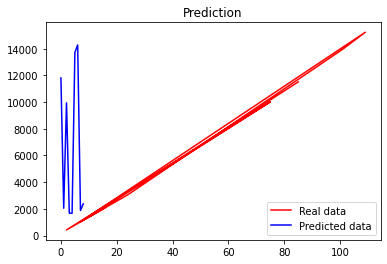

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
y_pred

array([[11812.589 ],
       [ 2048.6965],
       [ 9948.849 ],
       [ 1670.3448],
       [ 1670.9501],
       [13733.955 ],
       [14284.007 ],
       [ 1883.0764],
       [ 2373.7878]], dtype=float32)

In [ ]:
#y_test= np.array(y_test)
y_test


85     11520.0
10      1380.0
75     10020.0
2        420.0
24      3060.0
101    13980.0
109    15240.0
7       1020.0
16      2100.0
Name: duration, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
round(mse/60)

10787

In [ ]:
rmse=mean_squared_error(y_test, y_pred,squared=False)
rmse
round(rmse/60)

13

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
round(mae/60)

11